In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# plt.rcParams['figure.figsize'] = (10, 6)

from datetime import datetime

tourism_data = pd.read_excel('data/Tourism forecasting competition II dataset.xlsx', sheet_name='data for forecasting')
tourism_data["date"] = tourism_data["Unnamed: 0"].apply(lambda dt: datetime.strptime(dt, "%YM%m"))

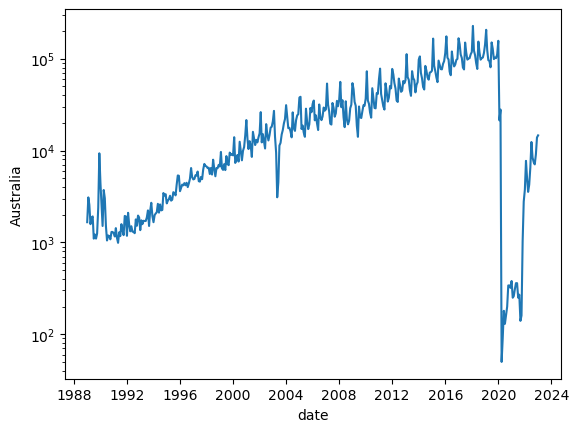

In [4]:
sns.lineplot(data = tourism_data, y = "Australia", x = "date")
plt.yscale("log")

<Axes: xlabel='date', ylabel='d12_1'>

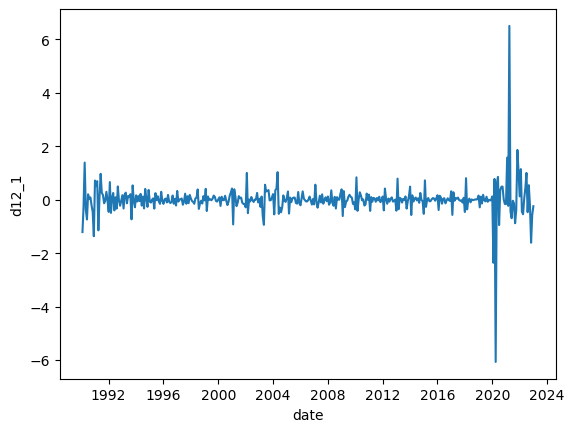

In [5]:
australia = tourism_data[["date", "Australia"]].copy()
australia.set_index("date", inplace=True)

australia["d12"] = np.log(australia / australia.shift(12))
australia["d12_1"] = australia["d12"] - australia["d12"].shift(1)

sns.lineplot(x = australia.index, y = australia.d12_1)

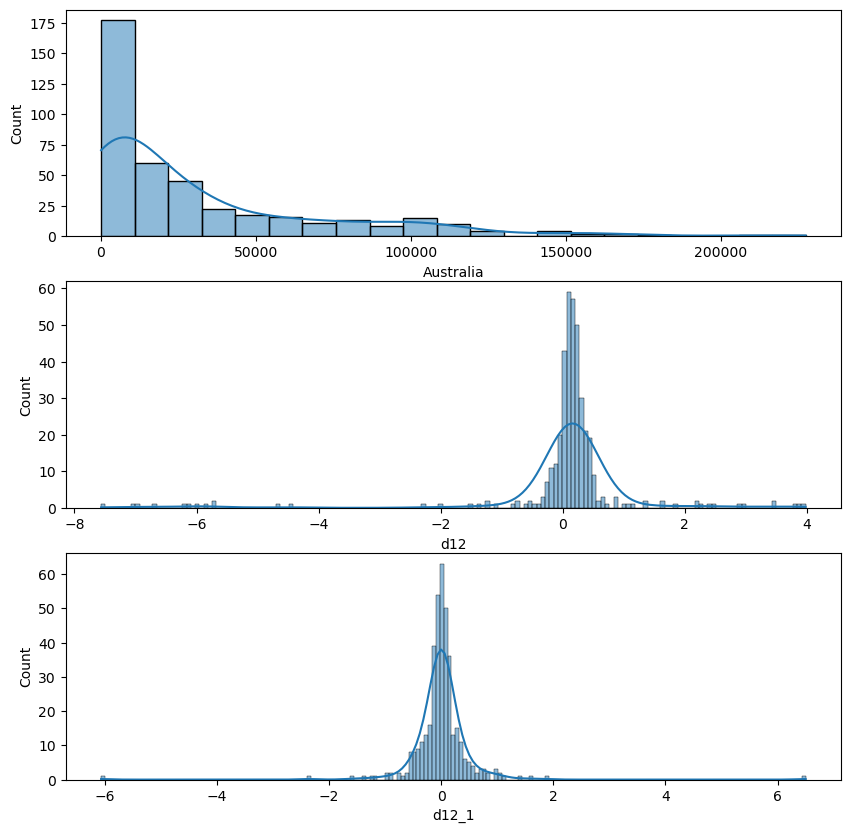

In [6]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

for i, col in enumerate(["Australia", "d12", "d12_1"]):
    sns.histplot(data = australia, x = col, ax = axs[i], kde = True)

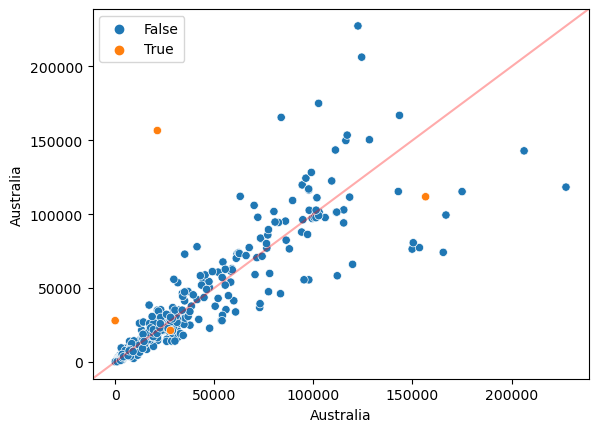

In [7]:
sns.scatterplot(x = australia.Australia, y = australia.Australia.shift(1), hue = australia.index.year == 2020)
plt.axline((0, 0), slope = 1, color = "red", alpha = .33)

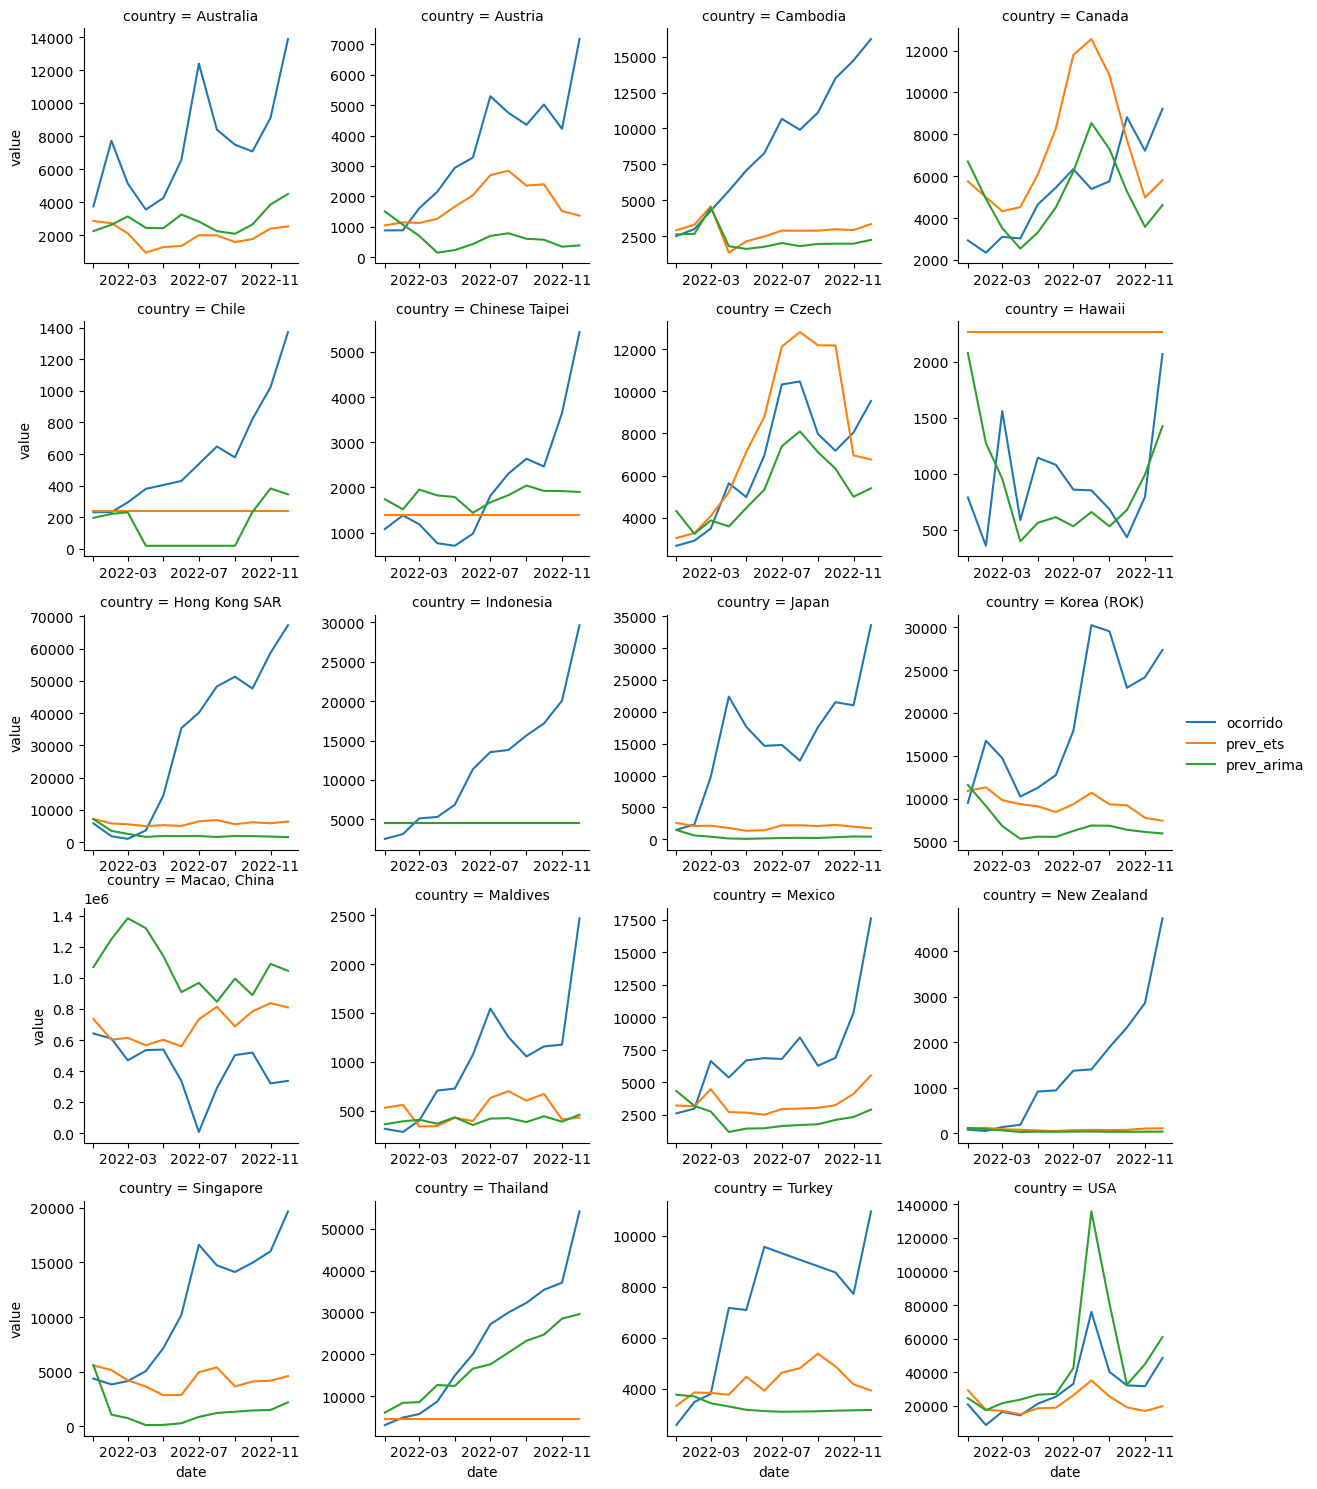

In [46]:
from datetime import datetime

# forecast = pd.read_csv("data/logexp_previsoes_completa_benchmarks.csv", index_col = 0, parse_dates = True)
forecast = pd.read_csv("data/logexp_previsoes_pre_covid_benchmarks.csv", index_col = 0, parse_dates = True)
forecast.rename(columns = {"pais": "country"}, inplace = True)

forecast["date"] = forecast["mes_ano"].apply( 
    lambda dt: datetime.strptime(dt, "%Y-%m-%d")
)

together = True
if together:
    melt = forecast.melt(
        id_vars=["country", "date"], value_vars=["ocorrido", "prev_ets", "prev_arima"]
    )

    g = sns.FacetGrid(data=melt, col="country", col_wrap=4, sharey=False, sharex=False).map(
        sns.lineplot, "date", "value", "variable"
    )
    g.add_legend()
    for ax in g.axes.flat:
        labels = ax.get_xticklabels()
        for i, l in enumerate(labels):
            l.set_visible(i % 2 == 1)
else:
    for country in forecast.country.unique():
        fig, ax = plt.subplots(figsize=(10, 6))
        past = tourism_data[["date", country]]
        sns.lineplot(
            data=past[(datetime(2020, 4, 1) <= past.date) & (past.date < datetime(2023, 1, 1))],
            x="date",
            y=country,
            label="ocorrido",
            ax=ax,
        )
        for col in ["ocorrido", "prev_ets", "prev_arima"]:
            sns.lineplot(
                data=forecast[forecast.country == country],
                x="date",
                y=col,
                label=col,
                ax=ax,
                alpha=0.5 if col != "ocorrido" else 1,
            )
        plt.title(country)
        plt.savefig(f"./imgs/{country}.png")

    plt.show()

In [24]:
import pandas as pd

forecast = pd.read_csv("data/previsoes_pre_covid_benchmarks.csv", index_col = 0, parse_dates = True)
algo = forecast[(forecast.pais == "Hong Kong SAR")]

pred = 16732226.48627308
# pred, sum(abs(algo.ocorrido - algo.prev_ets)), 
pred / sum(abs(algo.ocorrido - algo.prev_ets))

1.1800770859065577